In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
label = LabelEncoder()
df['Species'] = label.fit_transform(df['Species'])

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
df['Species'].unique()

array([0, 1, 2])

In [10]:
X = df.drop(['Id','Species'],axis=1)
Y = df.Species

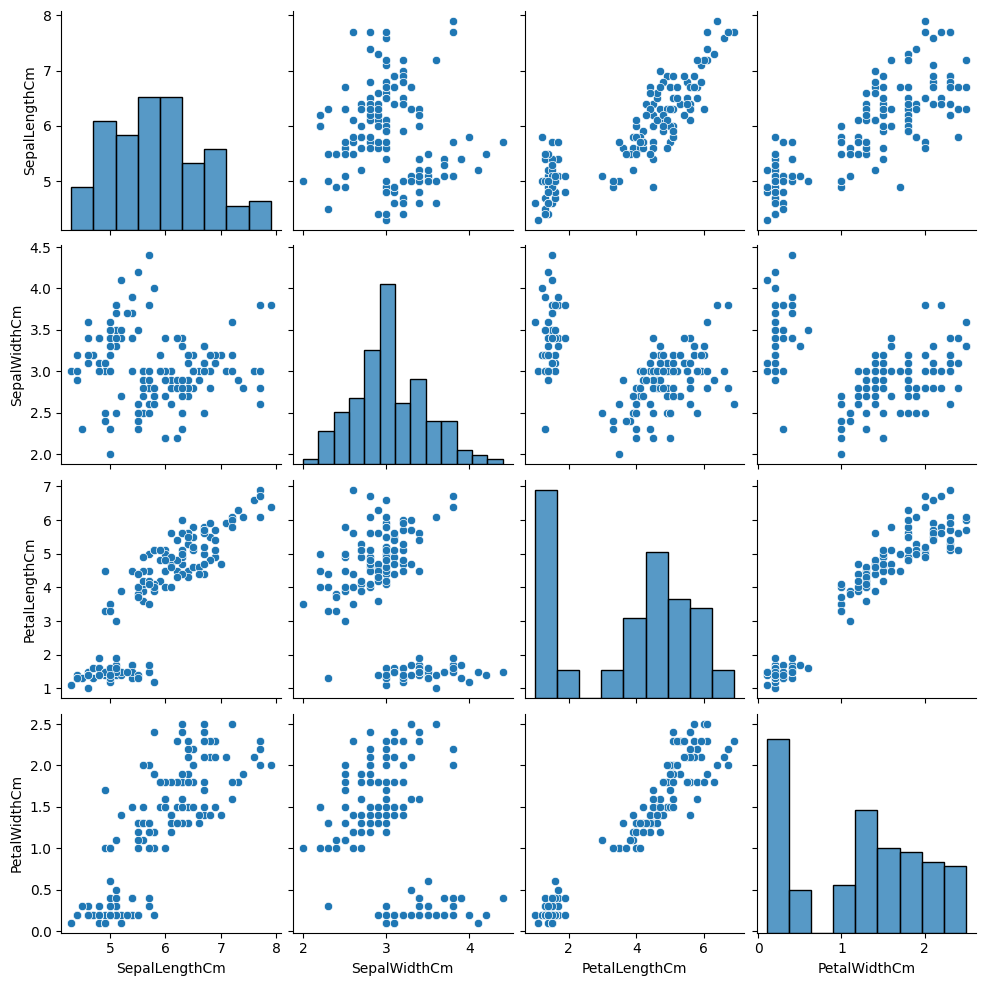

In [11]:
sns.pairplot(X)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred = dt.predict(x_test)

In [19]:
from sklearn import tree
text = tree.export_text(dt)
print(text)

|--- feature_3 <= -0.56
|   |--- class: 0
|--- feature_3 >  -0.56
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.64
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- feature_2 <= 0.92
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.92
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.58
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.58
|   |   |   |--- class: 2



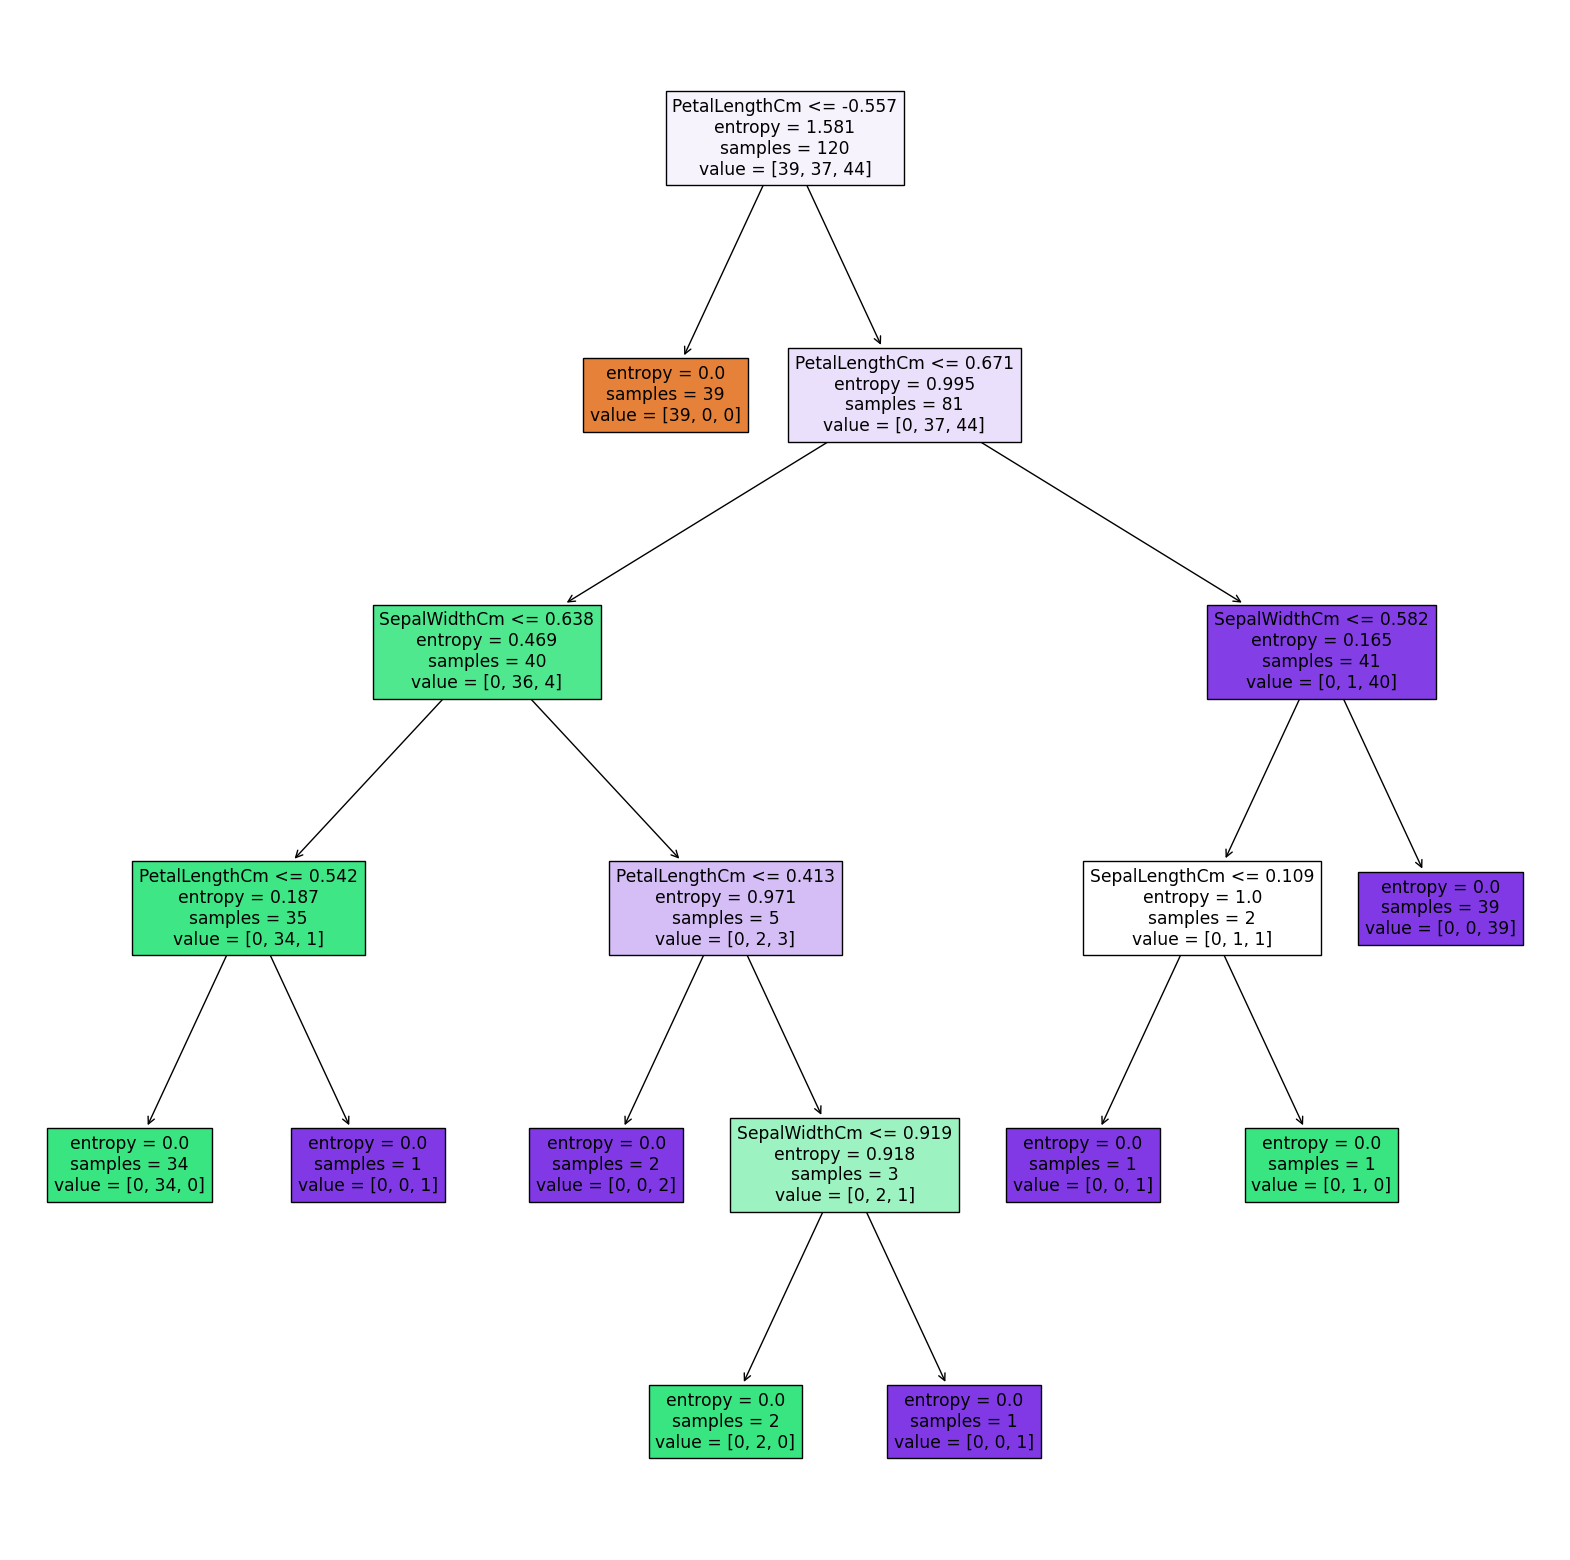

In [20]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt,feature_names=df.columns,filled=True)

In [23]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)


DecisionTreeRegressor(random_state=0)

In [24]:
y_pred = regressor.predict(x_test)

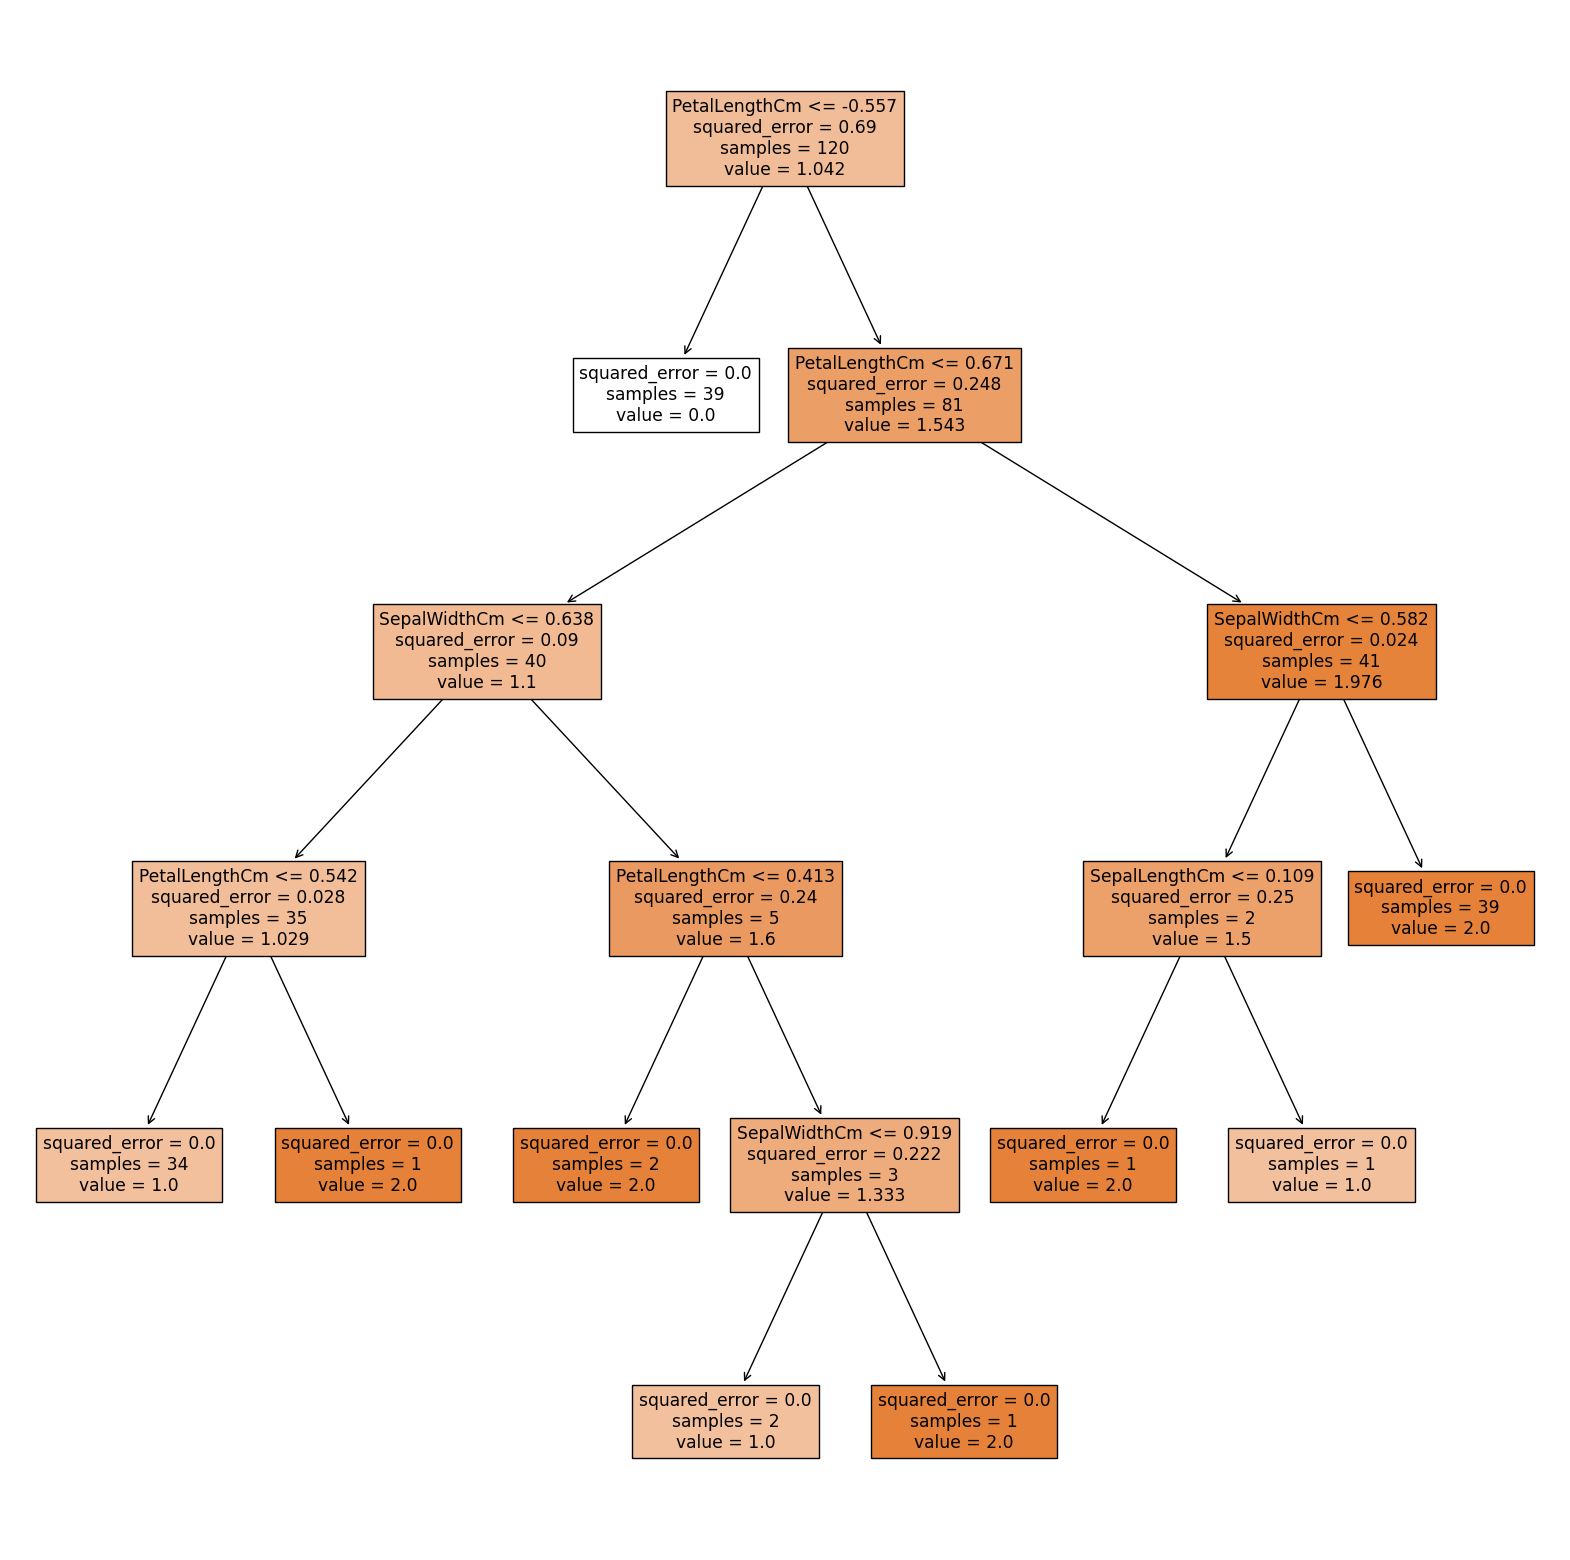

In [25]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor,feature_names=df.columns,filled=True)